In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/train.csv


In [2]:
import pandas as pd
from sklearn.metrics import roc_curve,auc,roc_auc_score
train = pd.read_csv("../input/train.csv")
train.head() #head is used to view top 5 row

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train['Loan_Status'].value_counts() # the data set is imbalanced

Y    345
N    155
Name: Loan_Status, dtype: int64

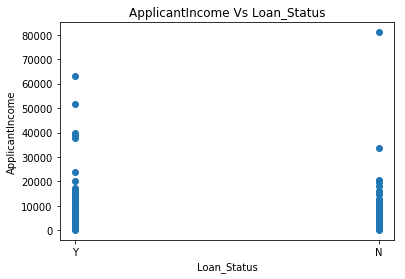

In [4]:
import matplotlib.pyplot as plt
plt.scatter(train['Loan_Status'],train['ApplicantIncome'])
plt.xlabel('Loan_Status')
plt.ylabel('ApplicantIncome')
plt.title("ApplicantIncome Vs Loan_Status")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

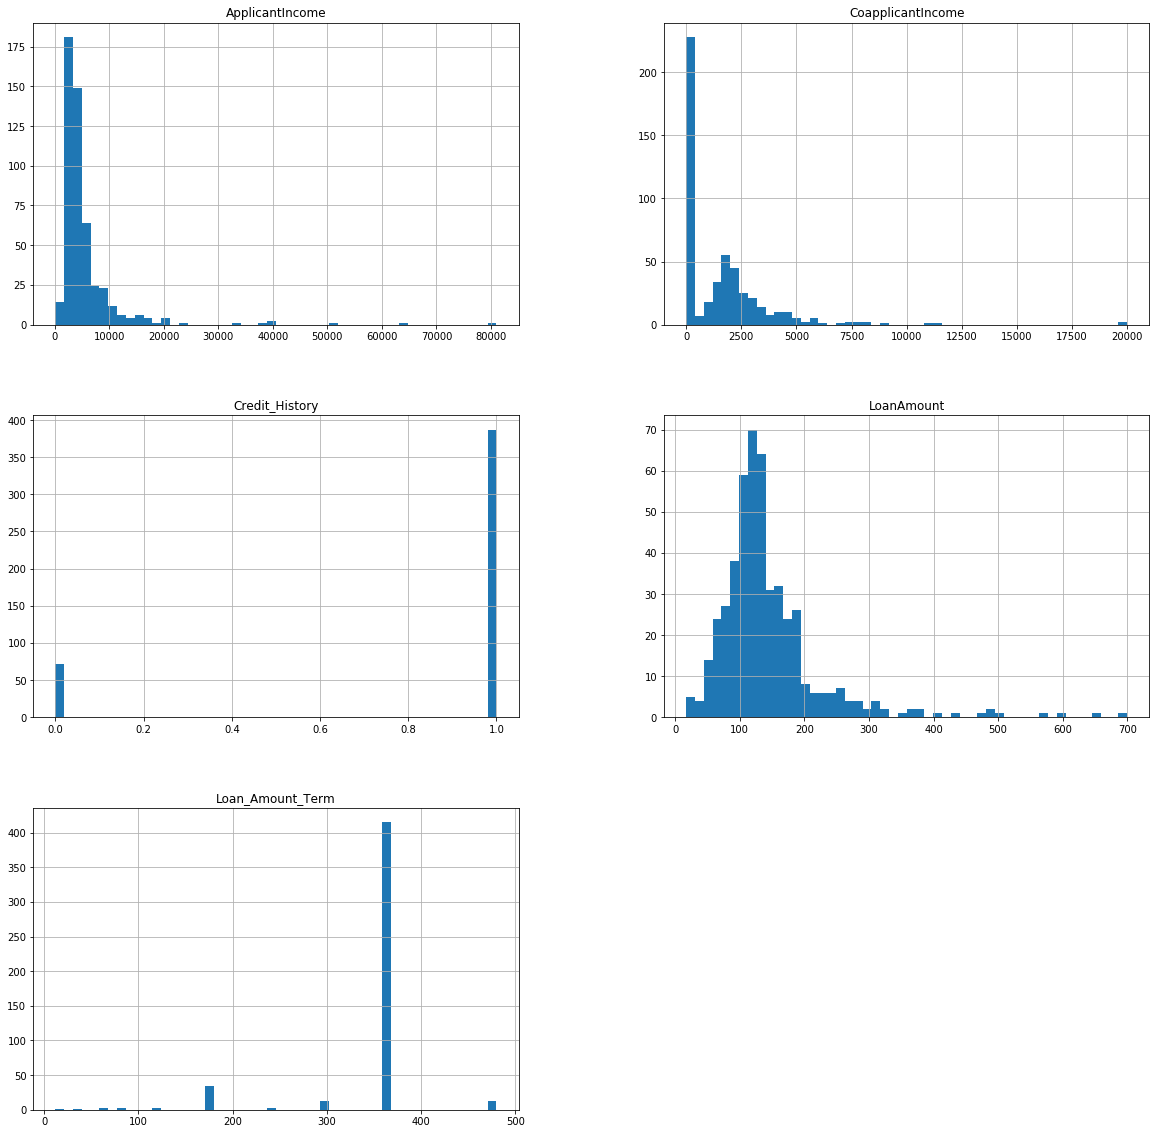

In [5]:
train.hist(bins=50,figsize=(20,20))
plt.show

In [6]:
train.describe() # Describe function is used to take a brief description about the data (like mean ,stander deaviation ,etc)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,500.000000,500.000000,482.000000,486.000000,459.000000
mean,5493.644000,1506.307840,144.020747,342.543210,0.843137
std,6515.668972,2134.432188,82.344919,63.834977,0.364068
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2874.500000,0.000000,100.000000,360.000000,1.000000
50%,3854.000000,1125.500000,126.500000,360.000000,1.000000
75%,5764.000000,2253.250000,161.500000,360.000000,1.000000
max,81000.000000,20000.000000,700.000000,480.000000,1.000000


In [7]:
co=train.corr()
co

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.121292,0.583289,-0.069086,-0.031342
CoapplicantIncome,-0.121292,1.000000,0.205980,0.006561,-0.028496
LoanAmount,0.583289,0.205980,1.000000,0.030737,-0.032947
Loan_Amount_Term,-0.069086,0.006561,0.030737,1.000000,0.018218
Credit_History,-0.031342,-0.028496,-0.032947,0.018218,1.000000


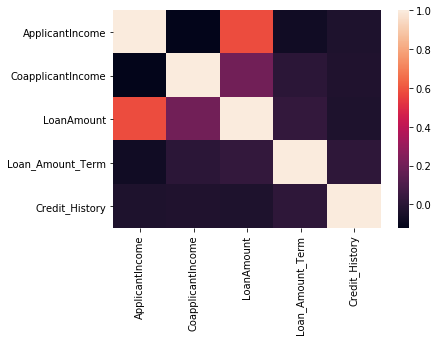

In [8]:
import seaborn as sns 
sns.heatmap(co)

In [9]:
#now spliting the data into data set and labels as X and y respectively
X=train.drop(['Loan_Status','Loan_ID'], axis=1) #data set
y=train['Loan_Status'].map({'N':0,'Y':1})# we can do this task by label encoding(label_encoder=preprocessing.LablelEncoder()// y=label_encoder.fit_transform(y))
#y=train['Loan_Status'] #labels 

In [10]:
X 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
495,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban
496,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural
497,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban
498,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban


In [11]:
X.isnull().sum() # used to check the null values in each field

Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
dtype: int64

In [12]:
X.info() #its used to check the data type of the fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Gender               491 non-null object
Married              497 non-null object
Dependents           488 non-null object
Education            500 non-null object
Self_Employed        473 non-null object
ApplicantIncome      500 non-null int64
CoapplicantIncome    500 non-null float64
LoanAmount           482 non-null float64
Loan_Amount_Term     486 non-null float64
Credit_History       459 non-null float64
Property_Area        500 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 43.1+ KB


In [13]:
#now felling the null values with suitable values

In [14]:
List=X.columns.tolist()
List

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [15]:
List.remove("ApplicantIncome")
List.remove("CoapplicantIncome")
List.remove("LoanAmount")


In [16]:
List

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [17]:
def count(x):
    t=X[x].value_counts()
    print(t)
def fill(m):
    X[m].fillna(X[m].mode()[0],inplace=True)

In [18]:
for i in List:
    count(i)
    fill(i)

Male      400
Female     91
Name: Gender, dtype: int64
Yes    322
No     175
Name: Married, dtype: int64
0     288
1      81
2      79
3+     40
Name: Dependents, dtype: int64
Graduate        393
Not Graduate    107
Name: Education, dtype: int64
No     407
Yes     66
Name: Self_Employed, dtype: int64
360.0    415
180.0     35
480.0     12
300.0     12
240.0      3
120.0      3
84.0       2
60.0       2
12.0       1
36.0       1
Name: Loan_Amount_Term, dtype: int64
1.0    387
0.0     72
Name: Credit_History, dtype: int64
Semiurban    188
Urban        171
Rural        141
Name: Property_Area, dtype: int64


In [19]:
mean_loan=X["ApplicantIncome"].mean()
X["ApplicantIncome"].fillna(mean_loan,inplace=True)

In [20]:
mean_loan=X["CoapplicantIncome"].mean()
X["CoapplicantIncome"].fillna(mean_loan,inplace=True)

In [21]:
mean_loan=X['LoanAmount'].mean()
X['LoanAmount'].fillna(mean_loan,inplace=True)

In [22]:
X.isnull().sum() # now we have replaced all the null values with respective mode in textual fields and mean in numaric fields

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [23]:
X=pd.get_dummies(X) # changes the alphabatical data into numarical data and adding more fields ( this is done for machine to learn more properly and accuratlyX)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X[X.columns]=scale.fit_transform(X[X.columns])

In [25]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.070489,0.0000,0.185975,0.74359,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.054830,0.0754,0.162518,0.74359,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.035250,0.0000,0.071742,0.74359,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.030093,0.1179,0.150805,0.74359,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.072356,0.0000,0.181552,0.74359,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [26]:
X.shape

(500, 20)

In [27]:
# now we are going to split the data into training data and testing data 

In [28]:
from sklearn.model_selection import train_test_split # sk learn is the package in python and model selection is the class of this package from wich train _test_split function is called

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [29]:
X_train.shape,X_test.shape

((350, 20), (150, 20))

In [30]:
y_train.shape,y_test.shape

((350,), (150,))

In [31]:
# now applying logistic regression model for train the machine
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
# now applying svm model for train the machine
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
# now applying DecisionTreeClassifier model for train the machine
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()
dtf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
# now applying GaussianNB model for train the machine
from sklearn.naive_bayes import GaussianNB
n_b = GaussianNB()
n_b.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
# now applying KNeighborsClassifier model for train the machine
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()  
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
# now checking the accuracy for each model below and choosing the best out of it

In [37]:
print(lr.score(X_test, y_test))
print(dtf.score(X_test, y_test))
print(n_b.score(X_test, y_test))
print(knn.score(X_test, y_test))
print(svc.score(X_test, y_test))

0.8066666666666666
0.74
0.78
0.6733333333333333
0.8066666666666666


In [38]:
#printing confusion_matrix( we need confusion matrix when data set is imbalance)
from sklearn.metrics import confusion_matrix
y_predict=lr.predict(X_test)
results=confusion_matrix(y_test,y_predict)
print("Linear rergression confusion matrix:")
print(results)

Linear rergression confusion matrix:
[[ 18  29]
 [  0 103]]


In [39]:
y_predict=dtf.predict(X_test)
results=confusion_matrix(y_test,y_predict)
print("decision Tree forest confusion matrix:")
print(results)

decision Tree forest confusion matrix:
[[25 22]
 [17 86]]


In [40]:
y_predict=n_b.predict(X_test)
results=confusion_matrix(y_test,y_predict)
print("n_b confusion matrix:")
print(results)

n_b confusion matrix:
[[21 26]
 [ 7 96]]


In [41]:
y_predict=knn.predict(X_test)
results=confusion_matrix(y_test,y_predict)
print("knn confusion matrix:")
print(results)

knn confusion matrix:
[[ 5 42]
 [ 7 96]]


In [42]:
y_predict=svc.predict(X_test)
results=confusion_matrix(y_test,y_predict)
print("svc confusion matrix:")
print(results)

svc confusion matrix:
[[ 18  29]
 [  0 103]]


In [43]:
#CONFUSION MATRIX OF LOGISTIC REGRESSION MODEL IS GOOD 

In [44]:
proba=lr.predict_proba(X_test)[0:5] #this shows the probability of any result being No or Yes
print(proba)

[[0.14024576 0.85975424]
 [0.21376587 0.78623413]
 [0.28846524 0.71153476]
 [0.24744835 0.75255165]
 [0.1135428  0.8864572 ]]


In [45]:
p=lr.predict_proba(X_test)[:,1]
p[0:5]

array([0.85975424, 0.78623413, 0.71153476, 0.75255165, 0.8864572 ])

In [46]:
fpr,tpr,threshold=roc_curve(y_test,p)

In [47]:
print("fpr",fpr[0:5])
print("tpr",tpr[0:5])
print("threshold",threshold[0:5])

fpr [0.        0.        0.        0.0212766 0.0212766]
tpr [0.         0.00970874 0.2038835  0.2038835  0.23300971]
threshold [1.90486159 0.90486159 0.88501681 0.88486236 0.87456084]


In [48]:
roc_auc=roc_auc_score(y_test,lr.predict(X_test))

In [49]:
roc_auc

0.6914893617021276

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "lower_right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


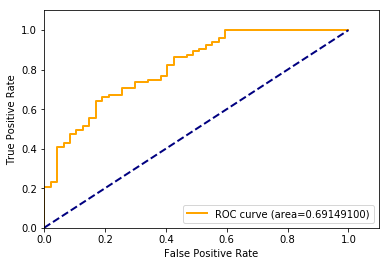

In [50]:
import matplotlib.pyplot as plt # matplotlib is used for plotting the curve
plt.figure()
lw=2
plt.plot(fpr,tpr,color='orange',lw=lw,label='ROC curve (area=%.5f100)'% roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=lw,linestyle='--')
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower_right")
plt.show()

In [51]:
y_predict=lr.predict_proba(X_test)
y_predict[0:5]

array([[0.14024576, 0.85975424],
       [0.21376587, 0.78623413],
       [0.28846524, 0.71153476],
       [0.24744835, 0.75255165],
       [0.1135428 , 0.8864572 ]])

In [52]:
from sklearn.preprocessing import binarize #important for converting the probability values in binary form

In [53]:
y_pred=binarize(y_predict,0.495)
y_pred[0:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [54]:
y_pred1=y_pred[:,1]
y_pred1 # the output is in float we need to convert this output into integer type

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.])

In [55]:
y_pred2=y_pred1.astype(int)
y_pred2 # now the output is in integer type

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [56]:
tuned_result=confusion_matrix(y_test,y_pred2)
print("confusion martics after tuning:")
print(tuned_result)

confusion martics after tuning:
[[ 18  29]
 [  0 103]]


In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.8066666666666666

**Dtf model tunning**

In [58]:
proba=dtf.predict_proba(X_test)[0:5] #this shows the probability of any result being No or Yes
print(proba)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [59]:
p=dtf.predict_proba(X_test)[:,1]
p[0:5]

array([0., 1., 1., 1., 1.])

In [60]:
fpr,tpr,threshold=roc_curve(y_test,p)

In [61]:
print("fpr",fpr[0:5])
print("tpr",tpr[0:5])
print("threshold",threshold[0:5])

fpr [0.         0.46808511 1.        ]
tpr [0.         0.83495146 1.        ]
threshold [2. 1. 0.]


In [62]:
roc_auc=roc_auc_score(y_test,lr.predict(X_test))

In [63]:
roc_auc

0.6914893617021276

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "lower_right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


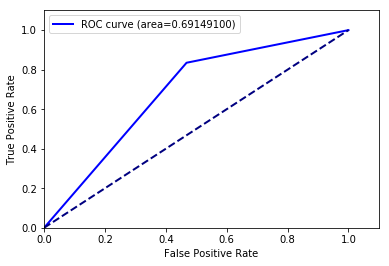

In [64]:
import matplotlib.pyplot as plt # matplotlib is used for plotting the curve
plt.figure()
lw=2
plt.plot(fpr,tpr,color='blue',lw=lw,label='ROC curve (area=%.5f100)'% roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=lw,linestyle='--')
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower_right")
plt.show()

In [65]:
y_predict=dtf.predict_proba(X_test)
y_predict[0:5]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [66]:
from sklearn.preprocessing import binarize #important for converting the probability values in binary form

In [67]:
y_pred=binarize(y_predict,0.495)
y_pred[0:5]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [68]:
y_pred1=y_pred[:,1]
y_pred1 # the output is in float we need to convert this output into integer type

array([0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.])

In [69]:
y_pred2=y_pred1.astype(int)
y_pred2 # now the output is in integer type

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0])

In [70]:
tuned_result=confusion_matrix(y_test,y_pred2)
print("confusion martics after tuning:")
print(tuned_result)

confusion martics after tuning:
[[25 22]
 [17 86]]


In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.74

**n_b model tunning**

In [72]:
proba=n_b.predict_proba(X_test[0:5]) #this shows the probability of any result being No or Yes
print(proba)

[[0.01192345 0.98807655]
 [0.39112315 0.60887685]
 [0.20150782 0.79849218]
 [0.1123427  0.8876573 ]
 [0.94218503 0.05781497]]


In [73]:
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [74]:
fpr,tpr,threshold=roc_curve(y_test,n_b.predict_proba(X_test)[:,1])

In [75]:
n_b.predict_proba(X_test)[:,1][0:5]

array([0.98807655, 0.60887685, 0.79849218, 0.8876573 , 0.05781497])

In [76]:
print("fpr:",fpr[0:5])
print("tpr:",tpr[0:5])
print("threshold:",threshold[0:5])

fpr: [0.        0.        0.        0.0212766 0.0212766]
tpr: [0.         0.00970874 0.0776699  0.0776699  0.16504854]
threshold: [1.99489188 0.99489188 0.99383637 0.99381784 0.99079669]


In [77]:
roc_auc=roc_auc_score(y_test,n_b.predict(X_test))

In [78]:
roc_auc

0.689423672794877

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "lower_right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


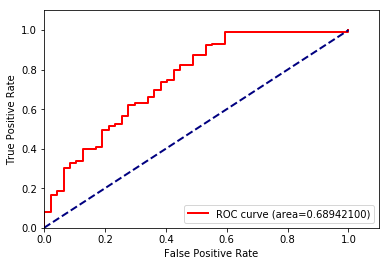

In [79]:
import matplotlib.pyplot as plt # matplotlib is used for plotting the curve
plt.figure()
lw=2
plt.plot(fpr,tpr,color='red',lw=lw,label='ROC curve (area=%.5f100)'% roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=lw,linestyle='--')
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower_right")
plt.show()

In [80]:
y_predict=n_b.predict_proba(X_test)
y_predict[0:5]

array([[0.01192345, 0.98807655],
       [0.39112315, 0.60887685],
       [0.20150782, 0.79849218],
       [0.1123427 , 0.8876573 ],
       [0.94218503, 0.05781497]])

In [81]:
from sklearn.preprocessing import binarize #important for converting the probability values in binary form

In [82]:
y_pred=binarize(y_predict,0.53)
y_pred[0:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [83]:
y_pred1=y_pred[:,1]
y_pred1 # the output is in float we need to convert this output into integer type

array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.])

In [84]:
y_pred1=y_pred[:,1]
y_pred1 # the output is in float we need to convert this output into integer type

array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.])

In [85]:
y_pred2=y_pred1.astype(int)
y_pred2 # now the output is in integer type

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0])

In [86]:
tuned_result=confusion_matrix(y_test,y_pred2)
print("confusion martics after tuning:")
print(tuned_result)

confusion martics after tuning:
[[21 26]
 [ 8 95]]


In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)


0.7733333333333333

**knn model tunning**

In [88]:
proba=knn.predict_proba(X_test[0:5]) #this shows the probability of any result being No or Yes
print(proba)

[[0.2 0.8]
 [0.6 0.4]
 [0.6 0.4]
 [0.2 0.8]
 [0.  1. ]]


In [89]:
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [90]:
fpr,tpr,threshold=roc_curve(y_test,knn.predict_proba(X_test)[:,1])

In [91]:
knn.predict_proba(X_test)[:,1][0:5]

array([0.8, 0.4, 0.4, 0.8, 1. ])

In [92]:
print("fpr:",fpr[0:5])
print("tpr:",tpr[0:5])
print("threshold:",threshold[0:5])

fpr: [0.         0.08510638 0.46808511 0.89361702 0.95744681]
tpr: [0.         0.38834951 0.78640777 0.93203883 0.99029126]
threshold: [2.  1.  0.8 0.6 0.4]


In [93]:
roc_auc=roc_auc_score(y_test,knn.predict(X_test))

In [94]:
roc_auc

0.5192109068374303

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "lower_right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


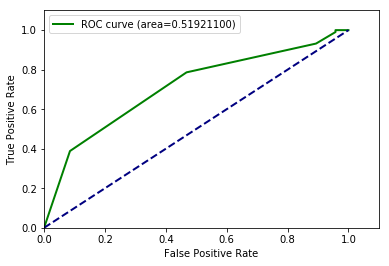

In [95]:
import matplotlib.pyplot as plt # matplotlib is used for plotting the curve
plt.figure()
lw=2
plt.plot(fpr,tpr,color='green',lw=lw,label='ROC curve (area=%.5f100)'% roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=lw,linestyle='--')
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower_right")
plt.show()

In [96]:
y_predict=knn.predict_proba(X_test)
y_predict[0:5]

array([[0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.2, 0.8],
       [0. , 1. ]])

In [97]:
from sklearn.preprocessing import binarize #important for converting the probability values in binary form


In [98]:
y_pred=binarize(y_predict,0.53)
y_pred[0:5]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [99]:
y_pred1=y_pred[:,1]
y_pred1 # the output is in float we need to convert this output into integer type

array([1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [100]:
y_pred2=y_pred1.astype(int)
y_pred2 # now the output is in integer type

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [101]:
tuned_result=confusion_matrix(y_test,y_pred2)
print("confusion martics after tuning:")
print(tuned_result)

confusion martics after tuning:
[[ 5 42]
 [ 7 96]]


In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)


0.6733333333333333